**Задание 2.7 (Самопроверка)**<br>
Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

In [72]:
import pandas as pd

data = pd.read_csv('data/wine_cleared.csv')

data_locality = data.copy()
regex = '\((.*?)\)' # регулярное выражение для нахождения чисел
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [97]:
data = pd.read_csv('data/wine_cleared_new.csv')

In [18]:
len(data.columns)

22

In [7]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_italy,is_france,old_wine,locality,area_country,years_diff
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,1,0,0,Etna,301230.0,3298.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,92391.0,4029.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,9372610.0,3298.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,9372610.0,3298.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,357022.0,3298.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Citation,75,2004-01-01,1,0,0,1,Oregon,9372610.0,6586.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Gresser,30,2013-01-01,0,0,1,0,Alsace,547030.0,3298.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Marcel Deiss,32,2012-01-01,0,0,1,0,Alsace,547030.0,3664.0


**Задание 5.3**<br>
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [10]:
import category_encoders as ce

#ord_encoder = ce.OrdinalEncoder()
#data_bin = ord_encoder.fit_transform(data[['year']])
#data = pd.concat([data, data_bin], axis=1)
# ИЛИ
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

**Задание 5.4**<br>
В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [20]:
taster_data = data.copy()
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
taster_bin = encoder.fit_transform(taster_data['taster_name'])
taster_data = pd.concat([taster_data, taster_bin], axis=1)

len(taster_data.columns) - len(data.columns)

20

**Задание 5.5**<br>
Закодируйте признак country двоичным способом.<br>
Сколько новых признаков образовалось после кодирования признака country?

In [22]:
data_binary_encoder = data.copy()
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data_binary_encoder['country'])
data_binary_encoder = pd.concat([data_binary_encoder, type_bin], axis=1)

len(data_binary_encoder.columns) - len(data.columns)

6

**Задание 5.8**<br>
На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.
В ответе напишите, сколько признаков добавилось после применения кодирования.

In [24]:
data_taster_twitter = data.copy()
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data_binary_encoder['taster_twitter_handle'])
data_taster_twitter = pd.concat([data_taster_twitter, type_bin], axis=1)

len(data_taster_twitter.columns) - len(data.columns)

5

**Задание 5.9**<br>Определите типы признаков и закодируйте их в соответствии с изученными способами.
Используйте следующий датафрейм для задания:

In [28]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [29]:
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [137]:
import pandas as pd
import numpy as np 

# для нормализации, стандартизации
from sklearn import preprocessing

df_norm = pd.read_csv('data/wine_cleared.csv')
col_names = ['price']

r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df_norm[['price']], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

In [141]:
round(df_r['price'].sum())

43501

**Задание 6.5**
<br>
Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [135]:
import pandas as pd
import numpy as np 

# для нормализации, стандартизации
from sklearn import preprocessing

df_standart = pd.read_csv('data/wine_cleared.csv')
col_names = ['price']

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df_standart[['price']], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

In [144]:
round(df_s['price'][129968], 2) 

-0.14

**Задание 7.4**<br>
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<Axes: >

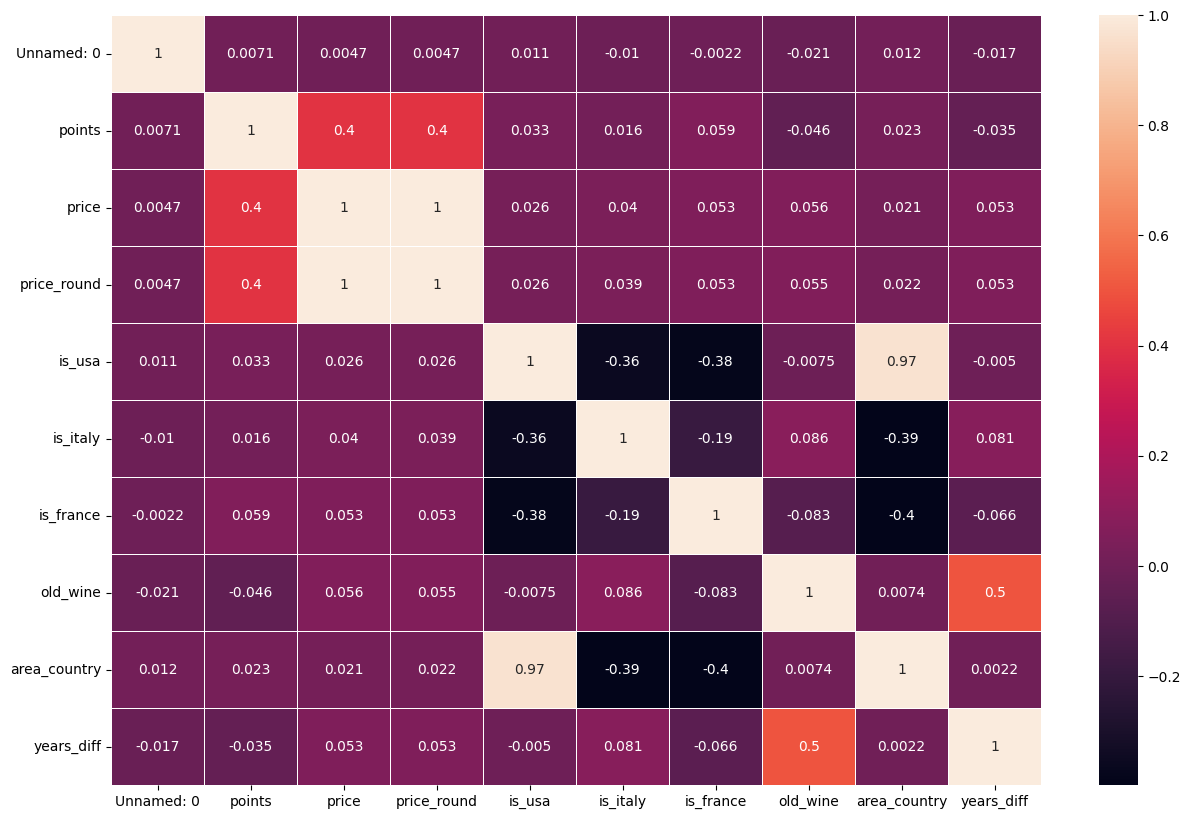

In [103]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


## 8. Проверка знаний

In [2]:
import pandas as pd
import numpy as np 

# для нормализации, стандартизации
from sklearn import preprocessing

df_heart = pd.read_csv('data/heart.csv')
df_heart.shape[1]

14

**Задание 8.1**<br>
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [3]:
df_heart['old'] = df_heart['age'].apply(lambda x: 1 if x>60 else 0)

In [4]:
df_heart['old'].sum()

79

In [5]:
df_heart.shape[1]

15

**Задание 8.2**<br>
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [6]:
def get_pressure(args):
    age = args[0]
    sex = args[1]
    if age <= 20:
        if sex == 1:
            return 123
        else:
            return  116
    elif age > 20 and age <= 30:
        if sex == 1:
            return 126
        else:
            return 120
    elif age > 30 and age <= 40:
        if sex == 1:
            return 129
        else:
            return 127
    elif age > 40 and age <= 50:
        if sex == 1:
            return 135
        else:
            return 137
    elif age > 50 and age <= 60:
        if sex == 1:
            return 142
        else:
            return 144
    elif age >= 61:
        if sex == 1:
            return 142
        else:
            return 159
df_heart['trestbps_mean'] = df_heart[['age', 'sex']].apply(get_pressure, axis=1)

In [7]:
df_heart.iloc[300]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [8]:
df_heart.shape[1]

16

**Задание 8.3-8.4**<BR>

In [29]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


**Задание 8.5**<BR>
Закодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?

In [9]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df_heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_heart = pd.concat([df_heart, type_bin], axis=1)

df_heart.shape[1]

35

**Задание 8.6**<br>
Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [66]:
col_names = ['trestbps', 'chol', 'thalach', 'oldpeak']

r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df_heart[['trestbps', 'chol', 'thalach', 'oldpeak']], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

In [68]:
round(df_r['chol'].std(), 6)

0.816232

**Задание 8.7**<br>
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

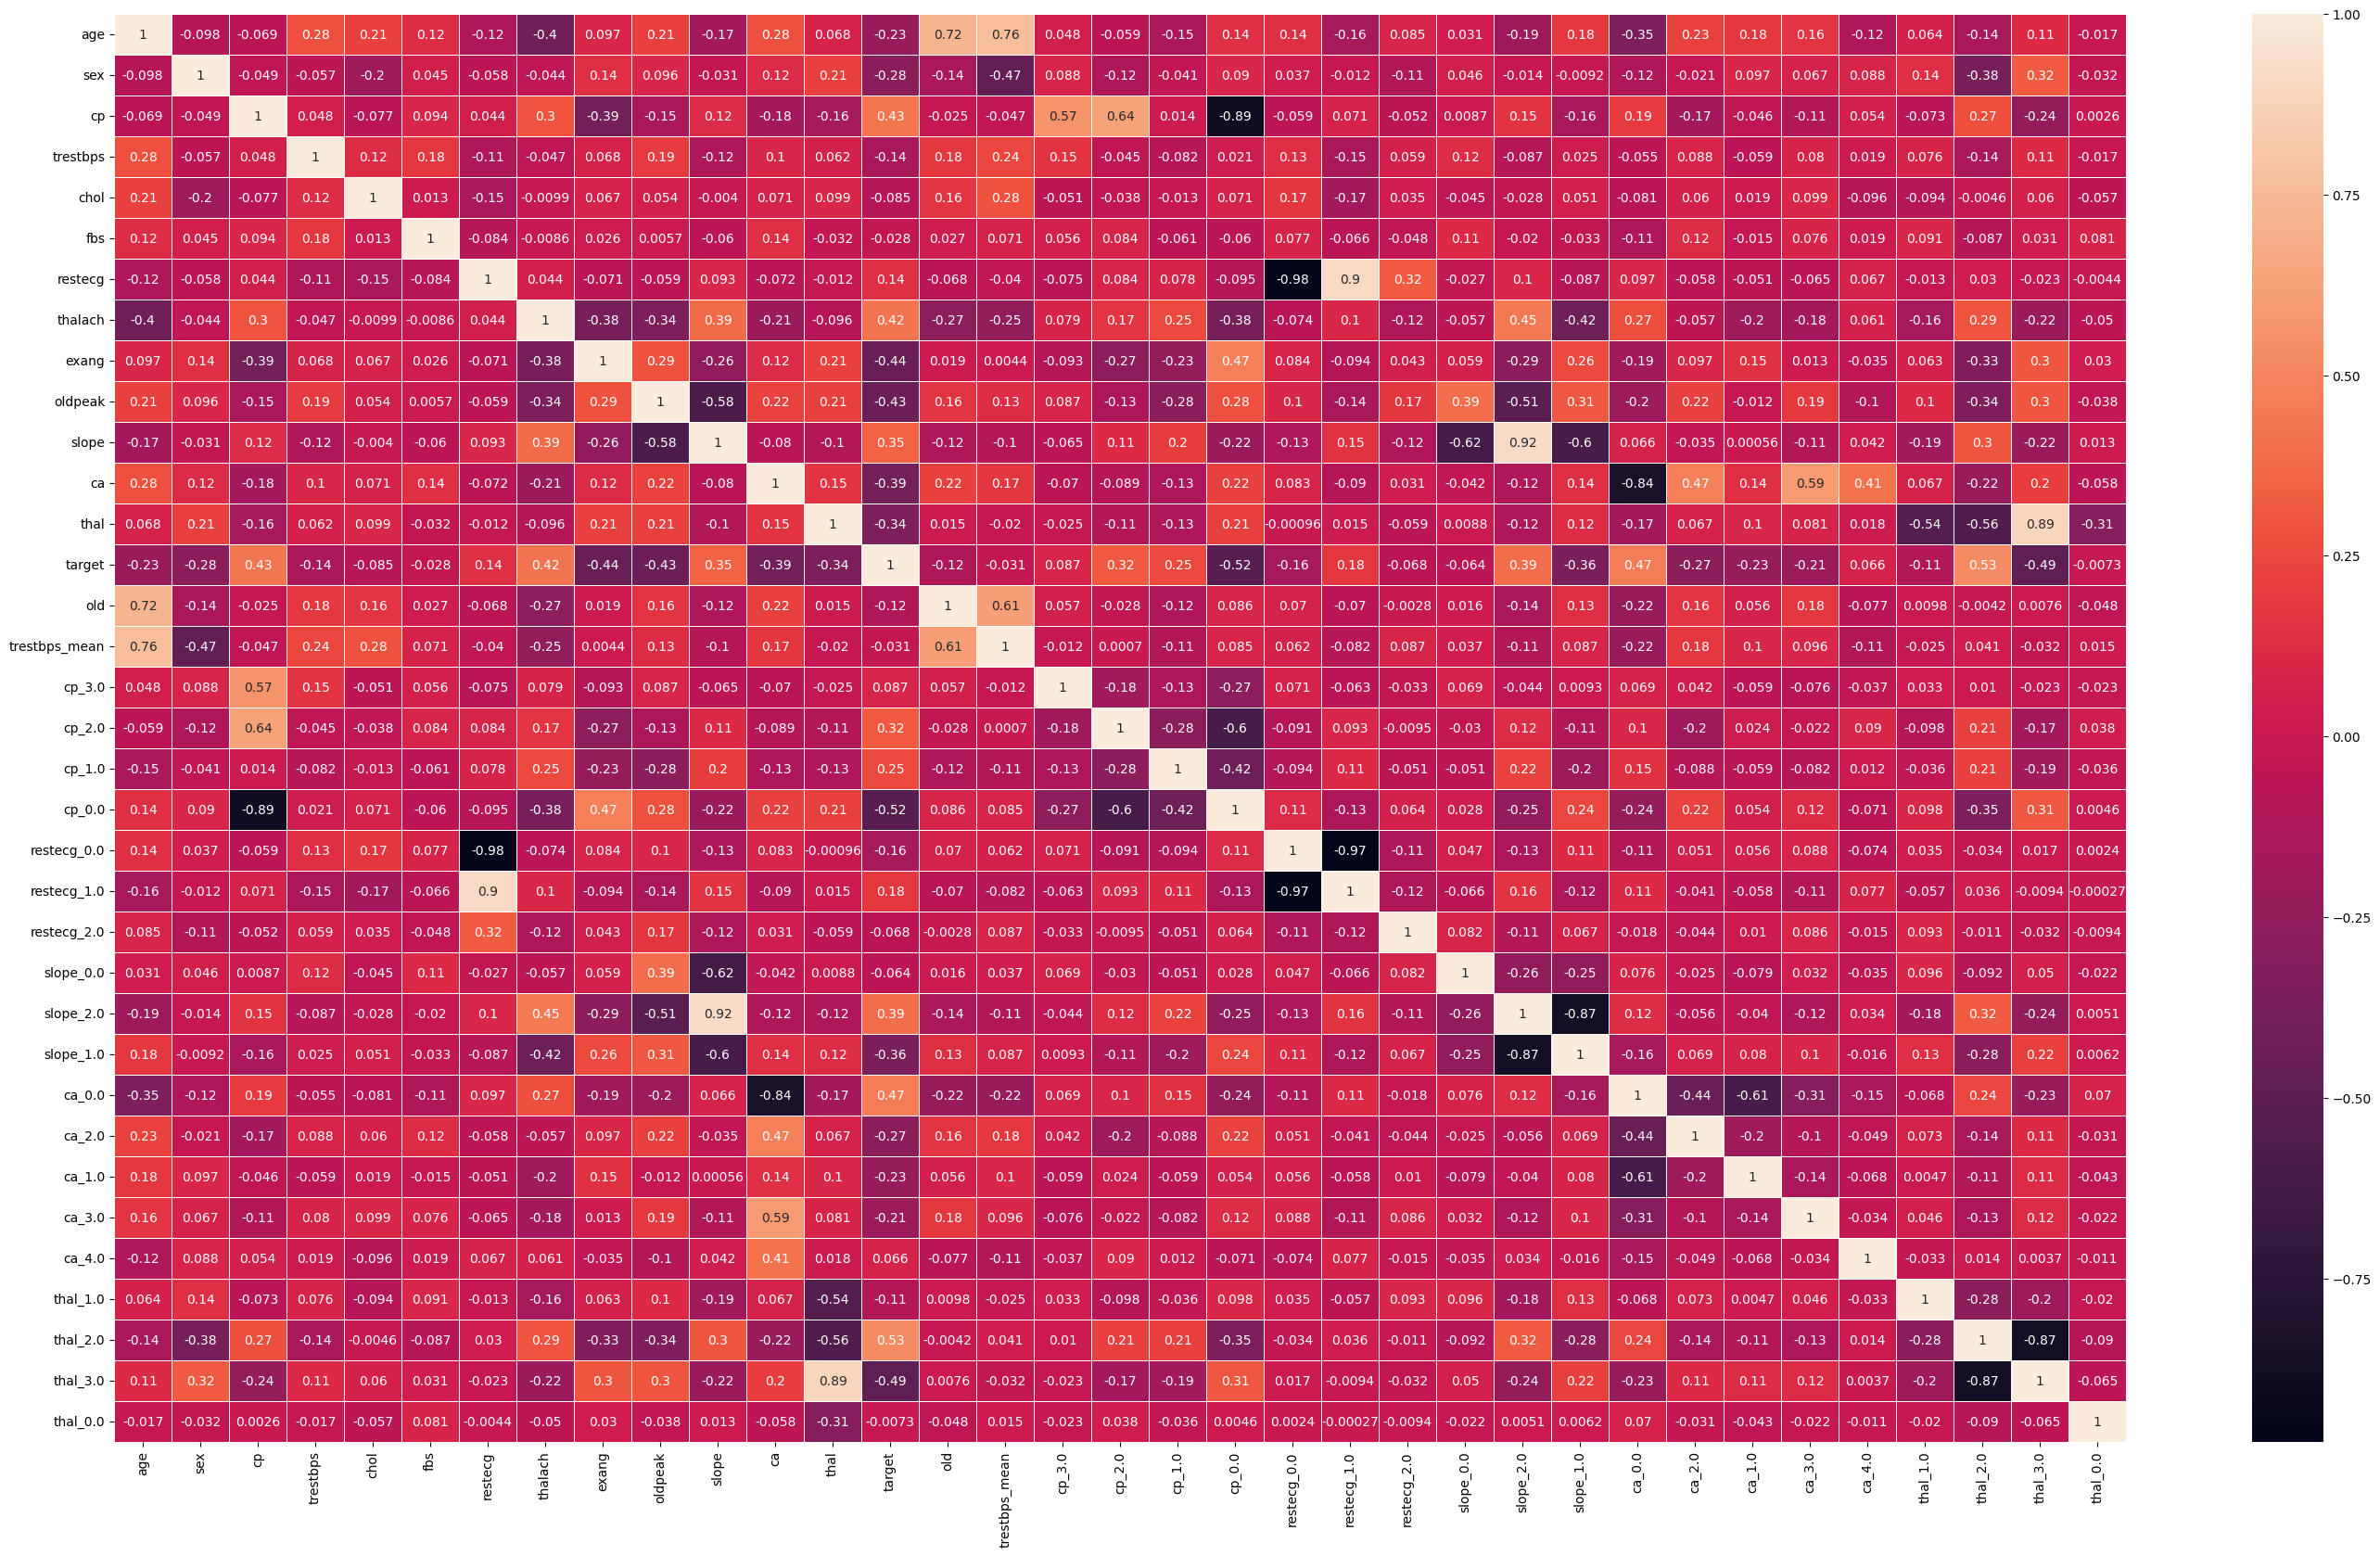

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(df_heart.corr(), annot=True, linewidths=.5, ax=ax)